<a href="https://colab.research.google.com/github/YuCaIb/Data-Science-Vahit-Keskin-Classes/blob/main/nlp_preprocess_visulase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word, TextBlob
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from PIL import Image
import nltk

In [2]:
df = pd.read_csv('/content/wiki_data.csv')

In [3]:
df.head()

,Unnamed: 0,text
0,1,Anovo\n\nAnovo (formerly A Novo) is a computer...
1,2,Battery indicator\n\nA battery indicator (also...
2,3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
3,4,CAVNET\n\nCAVNET was a secure military forum w...
4,5,CLidar\n\nThe CLidar is a scientific instrumen...


In [4]:
df.isnull().any()

Unnamed: 0    False
text          False
dtype: bool

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
def remove_stopwords(dataframe,colname,lang):
    ### I should be import nltk and nltk.download('stopwords') for this !!!
    sw =  stopwords.words(f'{lang}')
    dataframe[f'{colname}'] = dataframe[f'{colname}'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in sw))
###############################
def clean_text(dataframe,colname):
    #text to lower
    dataframe[f'{colname}']= dataframe[f'{colname}'].str.lower()
    #clean nums
    dataframe[f'{colname}']= dataframe[f'{colname}'].str.replace('\d','')
    ##clean punctions
    dataframe[f'{colname}'] = dataframe[f'{colname}'].str.replace('[^\w\s]','')
##################################
def remove_rare_words(dataframe, colname, verge):
    ## verge : the boundry for words to drop
    temp_df = pd.Series(' '.join(dataframe[f'{colname}']).split()).value_counts()
    drops = temp_df[temp_df<= verge]
    dataframe[f'{colname}'] = dataframe[f'{colname}'].apply(lambda x: ' '.join(x for x in x.split() if x not in drops))
###################################
def lemma(dataframe,colname):
    ## import nltk , nltk.download('wordnet')
    ## from textblob import Word, TextBlob
     dataframe[f'{colname}']=  dataframe[f'{colname}'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
##################################
def token(dataframe, colname):
    ## import nltk, nltk.download('punkt')
    ## from textblob import Word, TextBlob
    tokenized_list = dataframe[f'{colname}'].apply(lambda x: TextBlob(x).words)
    return tokenized_list
##################################
def frequancy_count(dataframe,colname):
    tf = dataframe[f'{colname}'].apply(lambda x : pd.value_counts(x.split(' '))).sum(axis=0).reset_index()
    tf.columns = ['words','tf']
    tf.sort_values('tf',ascending=False)
    return tf

In [11]:
clean_text(df,colname='text')
remove_stopwords(lang='english', colname='text', dataframe=df)
remove_rare_words(df,colname= 'text', verge=1000)
lemma(df,'text')
token_list =token(df,'text')

<ipython-input-10-d030aa0bd279>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe[f'{colname}']= dataframe[f'{colname}'].str.replace('\d','')
<ipython-input-10-d030aa0bd279>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe[f'{colname}'] = dataframe[f'{colname}'].str.replace('[^\w\s]','')


In [ ]:
tf = frequancy_count(df,'text')


In [11]:
tf

,words,tf
0,service,8201.0
1,company,13806.0
2,computer,6879.0
3,based,5614.0
4,france,1161.0
...,...,...
818,live,1070.0
819,steam,1549.0
820,radiation,1092.0
821,tape,1040.0


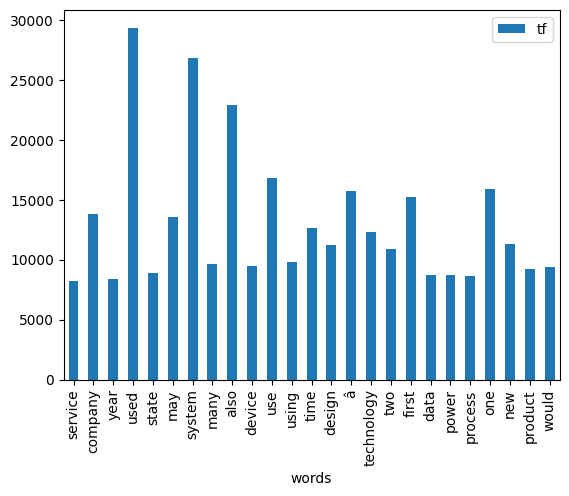

In [14]:
tf[tf['tf'] > 8000].plot.bar(x='words',y='tf');

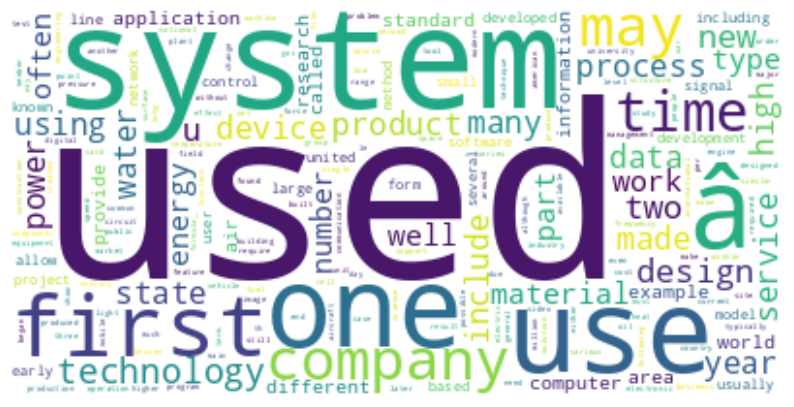

In [13]:
text = ' '.join(i for i in df['text'])
wordcloud = WordCloud(collocations=False, background_color='white').generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.savefig('mywordcloud.png')
plt.show()

In [15]:
def wordcld(dataframe, colname):
        text = ' '.join(i for i in dataframe[f'{colname}'])
        wordcloud = WordCloud(collocations=False, background_color='white').generate(text)
        plt.figure(figsize=(10,10))
        plt.imshow(wordcloud,interpolation='bilinear')
        plt.axis('off')
        plt.savefig('mywordcloud.png')
        plt.show()

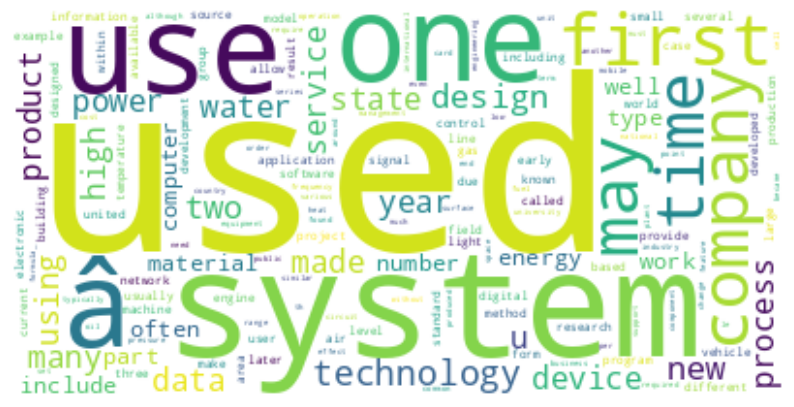

In [16]:
wordcld(df,'text')

Making A package

In [17]:
def text_preprocess_visulize(dataframe,colname,verge,lang,barplot=True):
    # dataframe: your dataframe's name
    # colname : give the columns name
    # verge : for drop to rare words, limit the minimum verge!
    # lang : for stop words, need language
    def remove_stopwords(dataframe,colname,lang):
        ### I should be import nltk and nltk.download('stopwords') for this !!!
        ### remove_stopwords function removes stop words, stopwords list taken from nltk.stopwords
        sw =  stopwords.words(f'{lang}')
        dataframe[f'{colname}'] = dataframe[f'{colname}'].apply(lambda x: ' '.join(x for x in str(x).split() if x not in sw))
###############################
    def clean_text(dataframe,colname):
        #clean_text function cleans text from nums and punctions and lowers the text.
        #text to lower
        dataframe[f'{colname}']= dataframe[f'{colname}'].str.lower()
        #clean nums
        dataframe[f'{colname}']= dataframe[f'{colname}'].str.replace('\d','')
        ##clean punctions
        dataframe[f'{colname}'] = dataframe[f'{colname}'].str.replace('[^\w\s]','')
##################################
    def remove_rare_words(dataframe, colname, verge):
        ## verge : the boundry for words to be droped
        temp_df = pd.Series(' '.join(dataframe[f'{colname}']).split()).value_counts()
        drops = temp_df[temp_df<= verge]
        dataframe[f'{colname}'] = dataframe[f'{colname}'].apply(lambda x: ' '.join(x for x in x.split() if x not in drops))
###################################
    def lemma(dataframe,colname):
        ## import nltk , nltk.download('wordnet')
        ## from textblob import Word, TextBlob
        ## lemmatizing the words in each row, in a certian column with TextBlob, Word()
        dataframe[f'{colname}']=  dataframe[f'{colname}'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
##################################
    def token(dataframe, colname):
        ## import nltk, nltk.download('punkt')
        ## from textblob import Word, TextBlob
        ## tokenizing a certian column for each row, and returns as a list
        tokenized_list = dataframe[f'{colname}'].apply(lambda x: TextBlob(x).words)
        return tokenized_list
    tokenized_list= token(dataframe, colname)
##################################
    def frequancy_count(dataframe,colname,barplot=True, verge=8000):
      ## counts frequancy of words and if barplot is True, plots a bar graph and you may arange verge(only the frequencies above verge will be plotting in bar plot)
      # else(barplot=False) plots wordcloud.
      ## also returns tf pandas series.
        tf = dataframe[f'{colname}'].apply(lambda x : pd.value_counts(x.split(' '))).sum(axis=0).reset_index()
        tf.columns = ['words','tf']
        tf.sort_values('tf',ascending=False)
        if barplot:
          tf[tf['tf'] > verge].plot.bar(x='words',y='tf');
        else:
          text = ' '.join(i for i in dataframe[f'{colname}'])
          wordcloud = WordCloud(collocations=False, background_color='white').generate(text)
          plt.figure(figsize=(10,10))
          plt.imshow(wordcloud,interpolation='bilinear')
          plt.axis('off')
          plt.savefig('mywordcloud.png')
          plt.show()
        return tf

    return tf,tokenized_list

In [18]:
df_2 = pd.read_csv('/content/wiki_data.csv')

In [ ]:
text_preprocess_visulize(dataframe= df_2, colname= 'text',verge =1000,lang ='english',barplot=False)

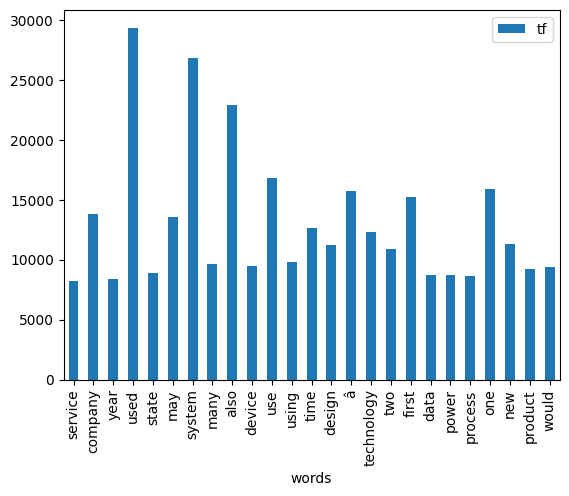

In [18]:
tf = frequancy_count(dataframe = df,colname = 'text', barplot=True)

In [19]:
tf

,words,tf
0,service,8201.0
1,company,13806.0
2,computer,6879.0
3,based,5614.0
4,france,1161.0
...,...,...
818,live,1070.0
819,steam,1549.0
820,radiation,1092.0
821,tape,1040.0
